In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Random Forests x Decision Trees

Falamos no artigo que bagging ajuda a diminuir a variância entre os modelos. Em outras palavras, bagging combina árvores overfittadas, criando um modelo com menor overfitting. A primeira coisa que vamos fazer nesse notebook é ver na prática como isso ocorre.

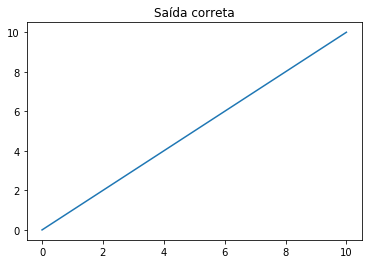

In [2]:
# Primeiro, vamos criar um dataset com a relação y = x
x = pd.DataFrame({'val': np.linspace(0, 10, 10)})
y = x.val
plt.plot(x, y)
plt.title('Saída correta')
plt.show()

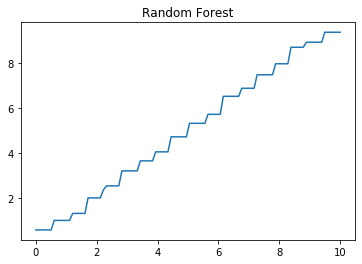

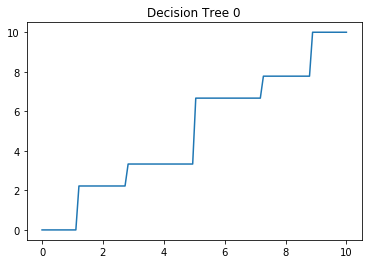

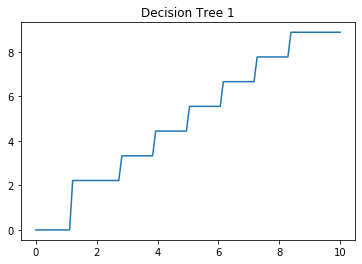

In [3]:
# Criamos o modelo de regressão com 50 árvores
rf = RandomForestRegressor(50)
rf.fit(x, y)

# Predições da random forest
x_pred = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = rf.predict(x_pred)

# predições das duas primeiras árvores do nosso modelo
y_pred0 = rf.estimators_[0].predict(x_pred)
y_pred1 = rf.estimators_[1].predict(x_pred)

plt.plot(x_pred, y_pred)
plt.title('Random Forest')
plt.show()

plt.plot(x_pred, y_pred0, label='Decision Tree 0')
plt.title('Decision Tree 0')
plt.show()

plt.plot(x_pred, y_pred1, label='Decision Tree 1')
plt.title('Decision Tree 1')
plt.show()

Observe que as árvores indivíduais se adaptam demais aos dados, ou seja, só aprendem as saídas corretas para os valores de (x, y) que estão em seu dataset de bootstrap. Já a random forest, que considera a média das árvores, consegue se aproximar mais da reta ideal (menor variância e menor overfitting).

# Dataset Wine
Vamos agora testar o modelo Random Forest no dataset [Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009), que contém dados de diversos vinhos. O objetivo é predizer a qualidade de um vinho com base em suas características.

In [4]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
x = wine.drop(['quality'], axis=1)
y = wine['quality']

In [6]:
# Criamos um modelo de classificação com 50 árvores e testamos ele por validação cruzada
rf = RandomForestClassifier(50)
score_rf = cross_val_score(rf, x, y, cv=5, scoring='accuracy').mean()

# Criamos uma única árvore para comparar com a floresta
dt = DecisionTreeClassifier()
score_dt = cross_val_score(dt, x, y, cv=5, scoring='accuracy').mean()

print(f'Scores: RandomForest={score_rf:.2f}, DecisionTree={score_dt:.2f}')

Scores: RandomForest=0.56, DecisionTree=0.48


No dataset Wine, podemos confirmar que o bagging realmente melhora a performance do modelo (de 48% para 56%).

## Hiperparâmetros

Agora que já vimos o básico sobre como utilizar Random Forests, vamos entender seus hiperparâmetros e como utilizá-los no sklearn. Dentre os hiperparâmetros, temos:
- `n_estimators` - o número de árvores
- `max_features` - o número máximo de features que serão passadas para uma dada árvore


Também temos hiperparâmetros como `criterion`, `max_depth` e outros que já existiam nas árvores de decisão. A floresta os utiliza na hora de gerar as árvores.

Como comentamos, `max_depth` limita a complexidade do modelo e, portanto, sua variância. Dessa forma, esperamos que diminuir `max_depth` possa prejudicar a floresta. Por outro lado, se esse hiperparâmetro for alto demais, a variância das árvores individualmente será muito alta e a floresta pode ser incapaz de reduzir significantemente a variância. Abaixo, verificamos que isso realmente ocorre.

In [7]:
print('Decision Trees')

dt = DecisionTreeClassifier(max_depth=100, random_state=42)
score = cross_val_score(dt, x, y, cv=5, scoring='accuracy').mean()
print(f'Score com max_depth=100: {score:.2f}')

dt = DecisionTreeClassifier(max_depth=10, random_state=42)
score = cross_val_score(dt, x, y, cv=5, scoring='accuracy').mean()
print(f'Score com max_depth= 10: {score:.2f}')

dt = DecisionTreeClassifier(max_depth=1, random_state=42)
score = cross_val_score(dt, x, y, cv=5, scoring='accuracy').mean()
print(f'Score com max_depth=  1: {score:.2f}')

Decision Trees
Score com max_depth=100: 0.47
Score com max_depth= 10: 0.49
Score com max_depth=  1: 0.54


Observe que nas árvores de decisão, o score aumenta quando `max_depth` tende a um. No entanto, ao realizar bagging, o score é maior para valores intermediários de `max_depth`, visto que a variância é reduzida.

In [8]:
print('Random Forests')

rf = RandomForestClassifier(10, max_depth=100, random_state=42)
score = cross_val_score(rf, x, y, cv=5, scoring='accuracy').mean()
print(f'Score com max_depth=100: {score:.2f}')

rf = RandomForestClassifier(10, max_depth=10, random_state=42)
score = cross_val_score(rf, x, y, cv=5, scoring='accuracy').mean()
print(f'Score com max_depth= 10: {score:.2f}')

rf = RandomForestClassifier(10, max_depth=1, random_state=42)
score = cross_val_score(rf, x, y, cv=5, scoring='accuracy').mean()
print(f'Score com max_depth=  1: {score:.2f}')

Random Forests
Score com max_depth=100: 0.55
Score com max_depth= 10: 0.57
Score com max_depth=  1: 0.54


Mais informações sobre os hiperparâmetros podem ser encontradas aqui: <https://scikit-learn.org/stable/modules/ensemble.html#random-forest-parameters>